In [1]:
import MDAnalysis as mda
import nglview as nv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import copy
import math
from tqdm import tqdm_notebook as tqdm

## Checking out the difference in distances between crosslinked aminoacids
- cys :82.a
- cys :104.a
- cys :43.b
- cys :81.b

In [33]:
mol=mda.Universe('/home/_shared/_projects/gmx_template/GMX_system/sys_ref.pdb','/home/_shared/_projects/gmx_template/big_data/sys_md.xtc')
pair1=[mol.select_atoms('segid A and resnum 82 and name CA' ),mol.select_atoms('segid B and resnum 81 and name CA')]
pair2=[mol.select_atoms('segid A and resnum 104 and name CA'),mol.select_atoms('segid B and resnum 43 and name CA')]
dist_native = pd.DataFrame(columns=['H3_82 - H4_81','H3_104 - H4_43'])
for ts in tqdm(mol.trajectory):
    dist_native.loc[ts.time] =[np.linalg.norm(np.subtract(*[sel.atoms.positions for sel in pair1]) ),
                               np.linalg.norm(np.subtract(*[sel.atoms.positions for sel in pair2]) )]
view= nv.show_mdanalysis(mol)
view.add_licorice('82:A 104:A 43:B 81:B')
view

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/coordinates/XDR.py:195: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "
/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/coordinates/XDR.py:212: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/home/_shared/_projects/gmx_template/big_data/.sys_md.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


NGLWidget(count=1123)

,H3_82 - H4_81,H3_104 - H4_43
count,1123.000000,1123.000000
mean,7.179557,7.009918
std,0.261609,0.256035
min,6.390848,6.218372
25%,6.991468,6.823676
50%,7.175474,7.009632
75%,7.359248,7.175931
max,7.958263,7.893967


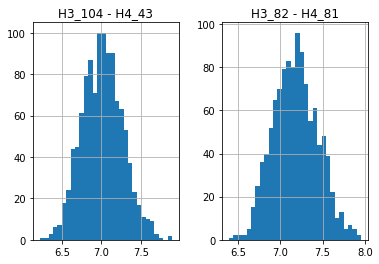

In [51]:
dist_native.hist(bins=30)
dist_native.describe()

In [47]:
mol=mda.Universe('/home/_shared/_projects/2018_h3-h4_mut_dyn/h3-h4_tm_mut_30_DNA_MD/GMX_system/sys_ref_renamed.pdb','/home/_shared/_projects/2018_h3-h4_mut_dyn/h3-h4_tm_mut_30_DNA_MD/big_data/sys_md.xtc')

#mol=mda.Universe('/home/_shared/_projects/2018_h3-h4_mut_dyn/h3-h4_tm_mut_MD_dCx/GMX_system/sys_ref_renamed.pdb','/home/_shared/_projects/2018_h3-h4_mut_dyn/h3-h4_tm_mut_MD_dCx/big_data/sys_md.xtc')
pair1=[mol.select_atoms('segid A and resnum 82 and name CA' ),mol.select_atoms('segid B and resnum 81 and name CA')]
pair2=[mol.select_atoms('segid A and resnum 104 and name CA'),mol.select_atoms('segid B and resnum 43 and name CA')]
dist_cross = pd.DataFrame(columns=['H3_82 - H4_81','H3_104 - H4_43'])
for ts in tqdm(mol.trajectory):
    dist_cross.loc[ts.time] =[np.linalg.norm(np.subtract(*[sel.atoms.positions for sel in pair1]) ),
                               np.linalg.norm(np.subtract(*[sel.atoms.positions for sel in pair2]) )]
view= nv.show_mdanalysis(mol)
view.add_licorice('82:A 104:A 43:B 81:B')
view

NGLWidget(count=2264)

,H3_82 - H4_81,H3_104 - H4_43
count,2264.000000,2264.000000
mean,5.957965,6.190287
std,0.166848,0.223568
min,5.405752,5.345478
25%,5.850088,6.048902
50%,5.958287,6.199560
75%,6.072969,6.354224
max,6.463336,6.752012


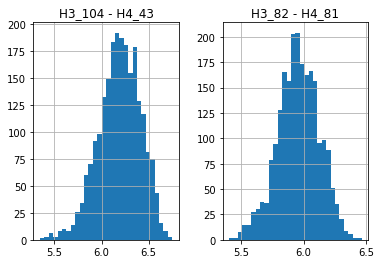

In [50]:
dist_cross.hist(bins=30)
dist_cross.describe()

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """
/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on 

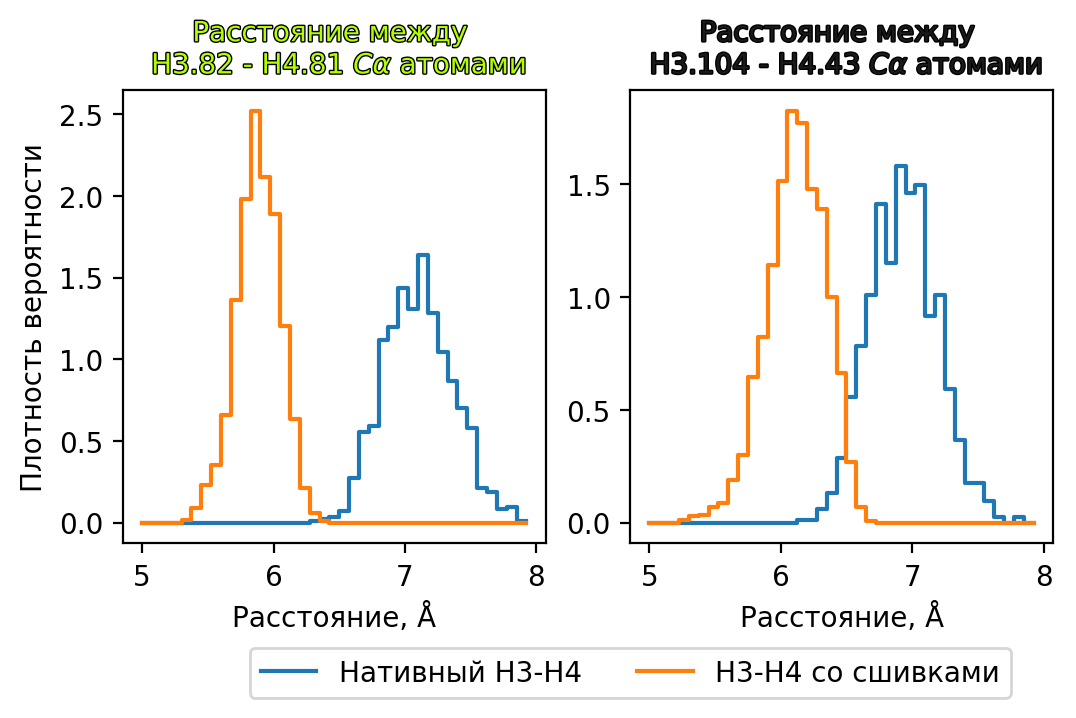

In [67]:
import matplotlib.patheffects as path_effects

fig,ax=plt.subplots(1,2,figsize=(6,3),dpi=200)
#'H3-H4-1 angle','DNA H3-H4-1 angle','DNA H3-H4-1 torsion'
native_dist_1=np.histogram(dist_native['H3_82 - H4_81'],bins=40,range=(5,8),normed=True)
native_dist_2=np.histogram(dist_native['H3_104 - H4_43'],bins=40,range=(5,8),normed=True)

cross_dist_1=np.histogram(dist_cross['H3_82 - H4_81'],bins=40,range=(5,8),normed=True)
cross_dist_2=np.histogram(dist_cross['H3_104 - H4_43'],bins=40,range=(5,8),normed=True)


ax[0].set_title('Расстояние между \n ' r'H3.82 - H4.81 $С\alpha$ атомами',color=[0.7,1,0.0],size=10,path_effects=[path_effects.Stroke(linewidth=1, foreground='black'),
                                                                    path_effects.Normal()])
#ax[0].axvline(x=74.258,color='k')
ax[0].step(native_dist_1[1][:-1],native_dist_1[0])
ax[0].step(cross_dist_1[1][:-1],cross_dist_1[0])
ax[0].set_xlabel(u'Расстояние, Å')
ax[0].set_ylabel(u'Плотность вероятности')

ax[1].set_title('Расстояние между \n ' r'H3.104 - H4.43 $С\alpha$ атомами' ,color=[0.1,0.1,0.1],size=10,path_effects=[path_effects.Stroke(linewidth=1, foreground='black'),
                                                                    path_effects.Normal()])
#ax[1].axvline(x=-111.287,color='k',label='Crystal structure')
ax[1].step(native_dist_2[1][:-1],native_dist_2[0],label=u'Нативный H3-H4')
ax[1].step(cross_dist_2[1][:-1],cross_dist_2[0],label=u'H3-H4 со сшивками')
ax[1].set_xlabel(u'Расстояние, Å')


#ax
#'H3-H3 angle','Tetramer torsion','DNA torsion'
#angles_df.hist(ax=ax,bins=50,)
#plt.show()
#fig,ax=plt.subplots(1,3,figsize=(9,3))
#angles_df_nucl.hist(ax=ax,bins=50,)
#plt.show()
ax[1].legend(loc='upper center', bbox_to_anchor=(0.0, -0.2), ncol=2)
#ax[1].legend()

plt.savefig('Results/dist_diff_cross_traj.png',dpi=300,bbox_inches = 'tight')
plt.show()